In [4]:
import episcanpy as epi
import anndata as ad
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

In [5]:
DATADIR = ''

# 10x data - only 10x peaks

In [4]:
input_file_10x_only = 'atac_pbmc_10k_nextgem_fragments_macs2_peaks_outter_all_chrom.h5ad'
adata = ad.read(DATADIR+input_file_10x_only)
adata

AnnData object with n_obs × n_vars = 513924 × 131565

In [38]:
# binarize the count matrix
epi.pp.binarize(adata)
np.max(adata.X)

1.0

### preliminary filtering

In [39]:
epi.pp.filter_cells(adata, min_features=100)
adata

AnnData object with n_obs × n_vars = 13557 × 131565
    obs: 'nb_features'

In [41]:
epi.pp.filter_features(adata, min_cells=10)
adata

AnnData object with n_obs × n_vars = 13557 × 131562
    obs: 'nb_features'
    var: 'n_cells'

### quality controls

In [42]:
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
adata

AnnData object with n_obs × n_vars = 13557 × 131562
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

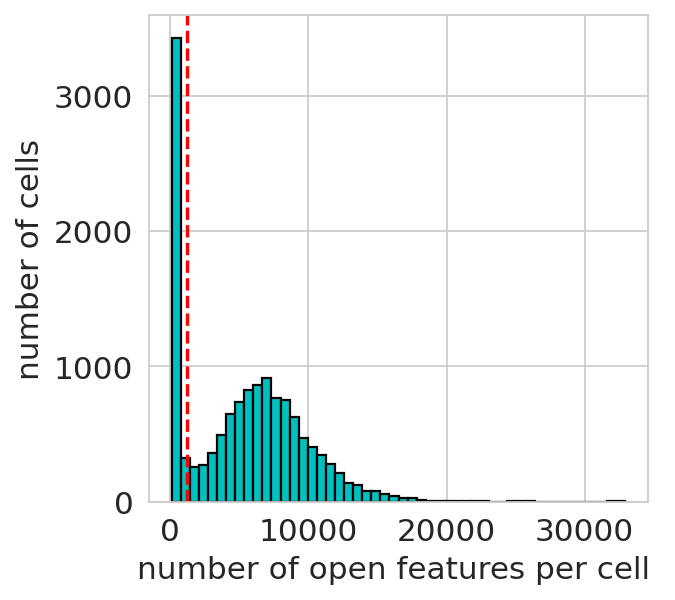

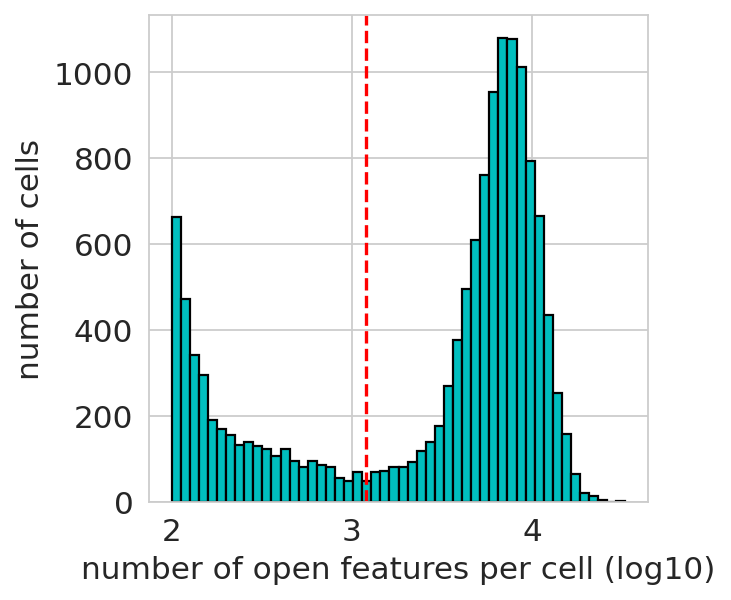

In [43]:
# set a minimum number of cells to keep 
min_features = 1200

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features, save='10x_coverage_cells_macs2_peaks_10x_only.png')
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features, save='10x_coverage_cells_macs2_peaks_10x_only_log.png')

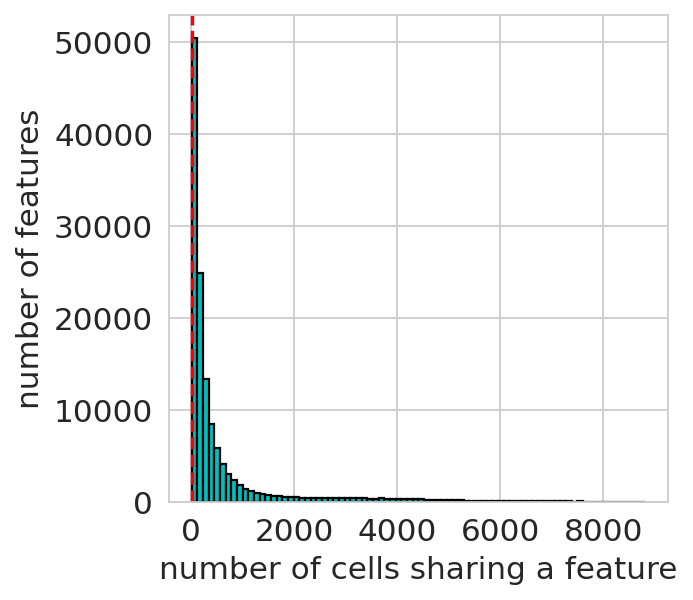

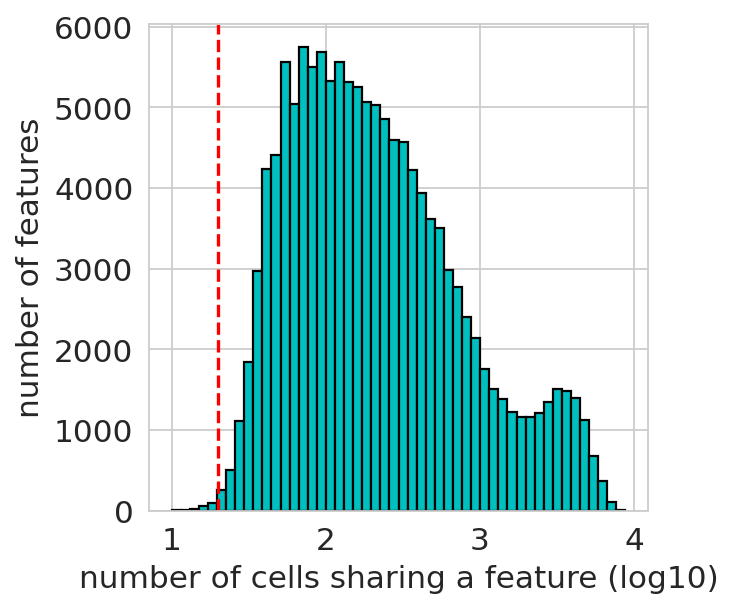

In [44]:
# minimum number of cells sharing a feature
min_cells = 20
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save='10x_feature_coverage_macs2_peaks_10x_only.png')
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save='10x_feature_coverage_macs2_peaks_10x_only_log.png')

In [45]:
epi.pp.filter_cells(adata, min_features=min_features)
adata

AnnData object with n_obs × n_vars = 9891 × 131562
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

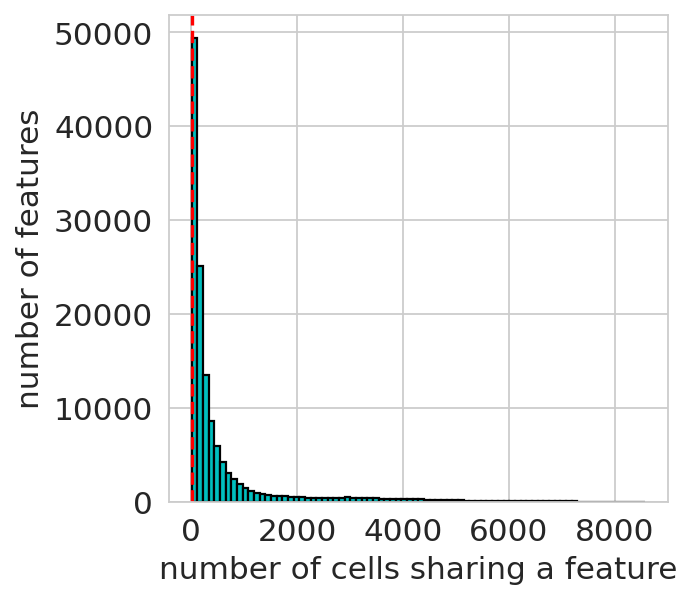

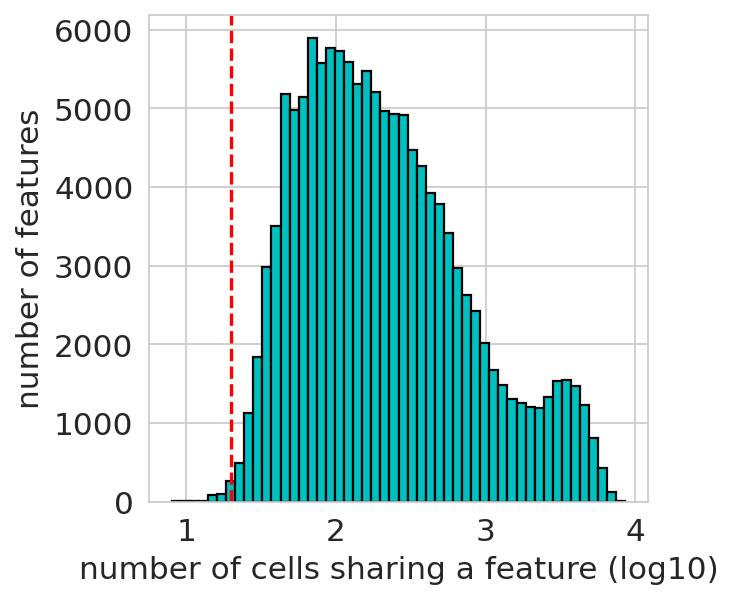

In [46]:
# minimum number of cells sharing a feature
min_cells = 20
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save='10x_feature_coverage_macs2_peaks_10x_only.png')
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save='10x_feature_coverage_macs2_peaks_10x_only_log.png')

In [47]:
epi.pp.filter_features(adata, min_cells=min_cells)
adata

AnnData object with n_obs × n_vars = 9891 × 131284
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

### slect variable features

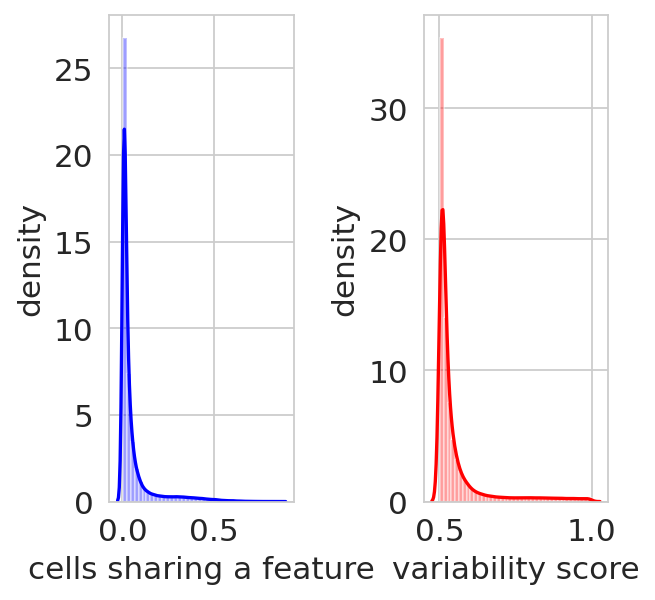

In [48]:
epi.pp.cal_var(adata)

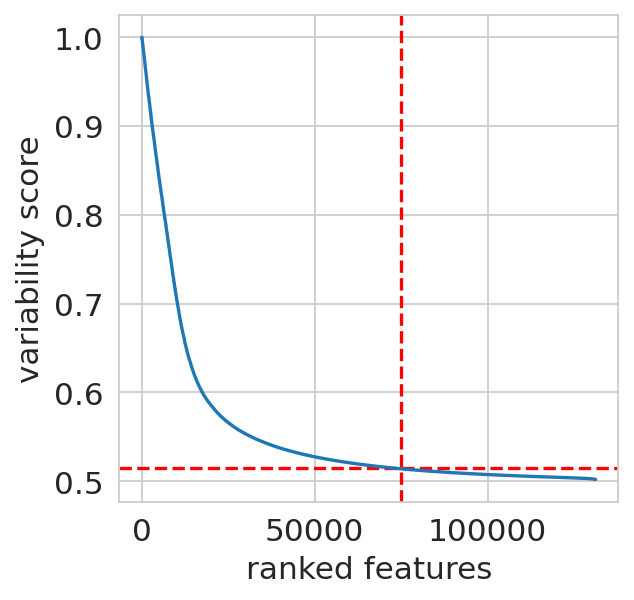

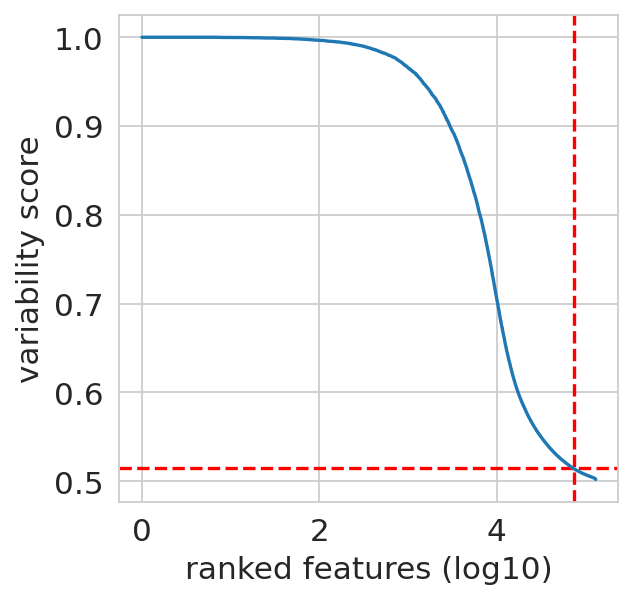

In [49]:
min_score_value = 0.515
nb_feature_selected = 75000
epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_10x_macs2_peaks_10x_only.png')

epi.pl.variability_features(adata,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_10x_macs2_peaks_10x_only_log.png')

In [50]:
# save the current matrix in the raw layer
adata.raw = adata

In [18]:
nb_feature_selected = 75000
# create a new AnnData containing only the most variable features
adata = epi.pp.select_var_feature(adata,
                                  nb_features=nb_feature_selected,
                                  show=False,
                                  copy=True)

In [ ]:
adata

### embedding and visualisation

In [ ]:
epi.pp.lazy(adata)
sc.pl.umap(adata, color=['nb_features'], wspace=0.3)

### normalising data

In [20]:
adata.layers['counts'] = adata.X
epi.pp.normalize_per_cell(adata)

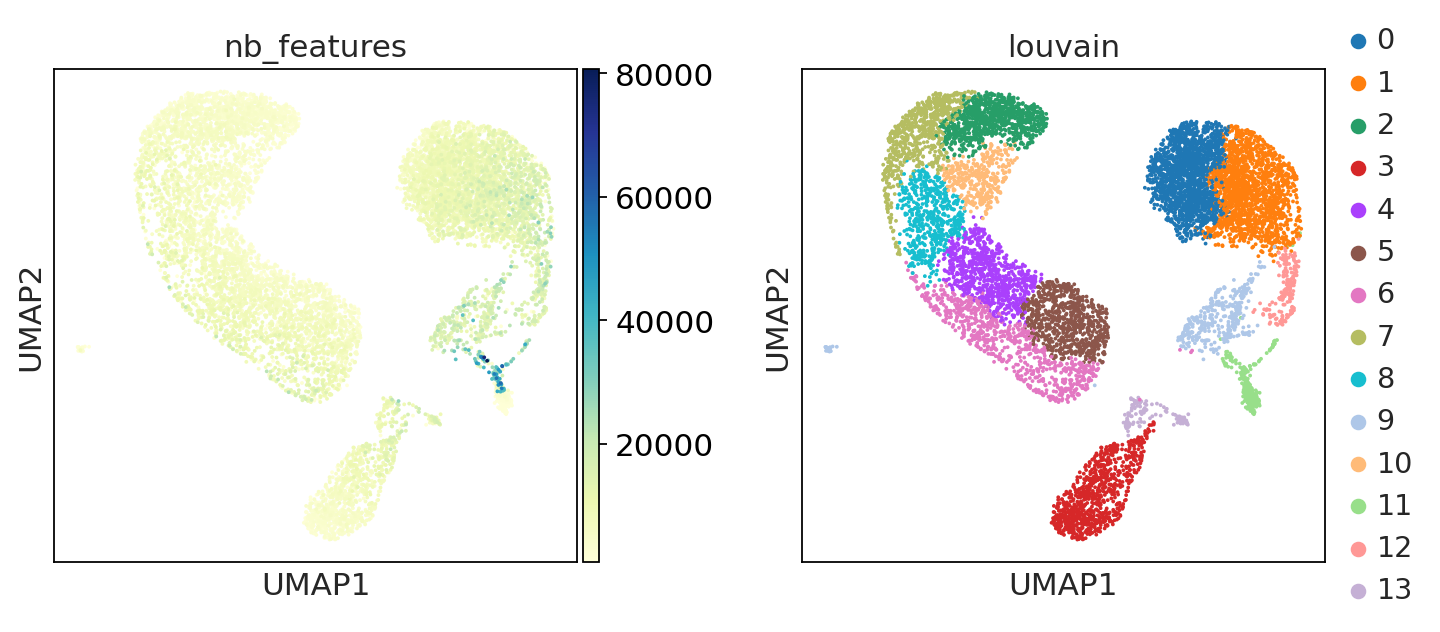

In [56]:
#epi.pp.lazy(adata)
#epi.tl.louvain(adata)
sc.pl.umap(adata, color=['nb_features', 'louvain'], wspace=0.3)

In [38]:
adata.write('10x_only_10k_cells_pbmc_macs2_processed_not_log1p.h5ad')